In [ ]:
import time
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import tensorflow as tf
import tensorflow.keras.backend as K
import logging

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [ ]:
params_appliance = {
    'kettle': {
        'windowlength': 599,
        'on_power_threshold': 2000,
        'max_on_power': 3998,
        'mean': 700,
        'std': 1000,
        's2s_length': 128,
        'houses': [1, 2],
        'channels': [10, 8],
        'train_build': [1],
        'test_build': 2,
    },
    'microwave': {
        'windowlength': 599,
        'on_power_threshold': 200,
        'max_on_power': 3969,
        'mean': 500,
        'std': 800,
        's2s_length': 128,
        'houses': [1, 2],
        'channels': [13, 15],
        'train_build': [1],
        'test_build': 2,
    },
    'fridge': {
        'windowlength': 599,
        'on_power_threshold': 50,
        'max_on_power': 3323,
        'mean': 200,
        'std': 400,
        's2s_length': 512,
        'houses': [1, 2],
        'channels': [12, 14],
        'train_build': [1],
        'test_build': 2,
    },
    'dishwasher': {
        'windowlength': 599,
        'on_power_threshold': 10,
        'max_on_power': 3964,
        'mean': 700,
        'std': 1000,
        's2s_length': 1536,
        'houses': [1, 2],
        'channels': [6, 13],
        'train_build': [1],
        'test_build': 2,
    },
    'washingmachine': {
        'windowlength': 599,
        'on_power_threshold': 20,
        'max_on_power': 3999,
        'mean': 400,
        'std': 700,
        's2s_length': 2000,
        'houses': [1, 2],
        'channels': [5, 12],
        'train_build': [1],
        'test_build': 2,
    }
}

appliance_data = {
    "kettle": {
        "mean": 700,
        "std": 1000,
        "houses": [2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 19, 20],
        "channels": [8, 9, 9, 8, 7, 9, 9, 7, 6, 9, 5, 9],
        "test_house": 2,
        "validation_house": 5,
    },
    "fridge": {
        "mean": 200,
        "std": 400,
        "houses": [2, 5, 9, 12, 15],
        "channels": [1, 1, 1, 1, 1],
        "test_house": 15,
        "validation_house": 12
    },
    "dishwasher": {
        "mean": 700,
        "std": 1000,
        "houses": [5, 7, 9, 13, 16, 18, 20],
        "channels": [4, 6, 4, 4, 6, 6, 5],
        "test_house": 9,
        "validation_house": 18,     
    },
    "washingmachine": {
        "mean": 400,
        "std": 700,
        "houses": [2, 5, 7, 8, 9, 15, 16, 17, 18],
        "channels": [2, 3, 5, 4, 3, 3, 5, 4, 5],
        "test_house": 8,
        "validation_house": 18,
    },
    "microwave": {
        "mean": 500,
        "std": 800,
        "houses": [4, 10, 12, 17, 19],
        "channels": [8, 8, 3, 7, 4],
        "test_house": 4,
        "validation_house": 17,
    },
}

mains_data = {
    "mean": 522,
    "std":  814        
    }

In [ ]:
DATASET_NAME = "ukdale"
APPLIANCE_NAME = 'fridge'
DATA_DIRECTORY = f"data/{DATASET_NAME}/"
SAVE_PATH = f"dataset_training/{DATASET_NAME}/{APPLIANCE_NAME}/"

# Dataset Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import os

# Default Variables
DATASET_NAME = "ukdale"
APPLIANCE_NAME = 'fridge'
DATA_DIRECTORY = f"data/{DATASET_NAME}/"
SAVE_PATH = f"dataset_training/{DATASET_NAME}/{APPLIANCE_NAME}/"
AGG_MEAN = 522
AGG_STD = 814
AGGREGATE_MEAN = AGG_MEAN
AGGREGATE_STD = AGG_STD

# Parameters
appliance_name = APPLIANCE_NAME
data_dir = DATA_DIRECTORY
save_path = SAVE_PATH
aggregate_mean = AGGREGATE_MEAN
aggregate_std = AGGREGATE_STD

if not os.path.exists(save_path):
    os.makedirs(save_path)

# Execution Start
start_time = time.time()
sample_seconds = 8
training_building_percent = 95
validation_percent = 13
nrows = None
debug = False

train = pd.DataFrame(columns=['aggregate', appliance_name])

params_appliance = {
    'kettle': {
        'windowlength': 599,
        'on_power_threshold': 2000,
        'max_on_power': 3998,
        'mean': 700,
        'std': 1000,
        's2s_length': 128,
        'houses': [1, 2],
        'channels': [10, 8],
        'train_build': [1],
        'test_build': 2,
    },
    'microwave': {
        'windowlength': 599,
        'on_power_threshold': 200,
        'max_on_power': 3969,
        'mean': 500,
        'std': 800,
        's2s_length': 128,
        'houses': [1, 2],
        'channels': [13, 15],
        'train_build': [1],
        'test_build': 2,
    },
    'fridge': {
        'windowlength': 599,
        'on_power_threshold': 50,
        'max_on_power': 3323,
        'mean': 200,
        'std': 400,
        's2s_length': 512,
        'houses': [1, 2],
        'channels': [12, 14],
        'train_build': [1],
        'test_build': 2,
    },
    'dishwasher': {
        'windowlength': 599,
        'on_power_threshold': 10,
        'max_on_power': 3964,
        'mean': 700,
        'std': 1000,
        's2s_length': 1536,
        'houses': [1, 2],
        'channels': [6, 13],
        'train_build': [1],
        'test_build': 2,
    },
    'washingmachine': {
        'windowlength': 599,
        'on_power_threshold': 20,
        'max_on_power': 3999,
        'mean': 400,
        'std': 700,
        's2s_length': 2000,
        'houses': [1, 2],
        'channels': [5, 12],
        'train_build': [1],
        'test_build': 2,
    }
}

def load_dataframe(directory, building, channel, col_names=['time', 'data'], nrows=None):
    df = pd.read_table(directory + 'house_' + str(building) + '/' + 'channel_' +
                       str(channel) + '.dat',
                       sep="\s+",
                       nrows=nrows,
                       usecols=[0, 1],
                       names=col_names,
                       dtype={'time': str},
                       )
    return df

# Process Data
for h in params_appliance[appliance_name]['houses']:
    print('    ' + data_dir + 'house_' + str(h) + '/'
          + 'channel_' +
          str(params_appliance[appliance_name]['channels'][params_appliance[appliance_name]['houses'].index(h)]) +
          '.dat')

    mains_df = load_dataframe(data_dir, h, 1)
    app_df = load_dataframe(data_dir,
                            h,
                            params_appliance[appliance_name]['channels'][params_appliance[appliance_name]['houses'].index(h)],
                            col_names=['time', appliance_name]
                            )

    mains_df['time'] = pd.to_datetime(mains_df['time'], unit='s')
    mains_df.set_index('time', inplace=True)
    mains_df.columns = ['aggregate']
    mains_df.reset_index(inplace=True)

    if debug:
        print("    mains_df:")
        print(mains_df.head())
        plt.plot(mains_df['time'], mains_df['aggregate'])
        plt.show()

    app_df['time'] = pd.to_datetime(app_df['time'], unit='s')

    if debug:
        print("app_df:")
        print(app_df.head())
        plt.plot(app_df['time'], app_df[appliance_name])
        plt.show()

    # Align timestamps
    mains_df.set_index('time', inplace=True)
    app_df.set_index('time', inplace=True)

    df_align = mains_df.join(app_df, how='outer').resample(str(sample_seconds) + 'S').mean().fillna(method='backfill', limit=1)
    df_align = df_align.dropna()
    df_align.reset_index(inplace=True)

    del mains_df, app_df, df_align['time']

    if debug:
        print("df_align:")
        print(df_align.head())
        plt.plot(df_align['aggregate'].values)
        plt.plot(df_align[appliance_name].values)
        plt.show()

    # Normalization
    mean = params_appliance[appliance_name]['mean']
    std = params_appliance[appliance_name]['std']

    df_align['aggregate'] = (df_align['aggregate'] - aggregate_mean) / aggregate_std
    df_align[appliance_name] = (df_align[appliance_name] - mean) / std

    if h == params_appliance[appliance_name]['test_build']:
        df_align.to_csv(save_path + appliance_name + '_test_.csv', mode='a', index=False, header=False)
        print("    Size of test set is {:.4f} M rows.".format(len(df_align) / 10 ** 6))
        continue

    train = pd.concat([train, df_align], ignore_index=True)
    del df_align

# Crop Training Data
if training_building_percent != 0:
    train.drop(train.index[-int((len(train)/100)*training_building_percent):], inplace=True)

# Validation Set
val_len = int((len(train)/100)*validation_percent)
val = train.tail(val_len)
val.reset_index(drop=True, inplace=True)
train.drop(train.index[-val_len:], inplace=True)

val.to_csv(save_path + appliance_name + '_validation_' + '.csv', mode='a', index=False, header=False)

# Training Set
train.to_csv(save_path + appliance_name + '_training_.csv', mode='a', index=False, header=False)

print("    Size of total training set is {:.4f} M rows.".format(len(train) / 10 ** 6))
print("    Size of total validation set is {:.4f} M rows.".format(len(val) / 10 ** 6))
del train, val

print("\nPlease find files in: " + save_path)
print("Total elapsed time: {:.2f} min.".format((time.time() - start_time) / 60))

    data/ukdale/house_1/channel_12.dat


/tmp/ipykernel_205960/245862065.py:124: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  mains_df['time'] = pd.to_datetime(mains_df['time'], unit='s')
/tmp/ipykernel_205960/245862065.py:135: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  app_df['time'] = pd.to_datetime(app_df['time'], unit='s')


    data/ukdale/house_2/channel_14.dat


/tmp/ipykernel_205960/245862065.py:124: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  mains_df['time'] = pd.to_datetime(mains_df['time'], unit='s')
/tmp/ipykernel_205960/245862065.py:135: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  app_df['time'] = pd.to_datetime(app_df['time'], unit='s')


    Size of test set is 0.1620 M rows.
    Size of total training set is 0.0912 M rows.
    Size of total validation set is 0.0136 M rows.

Please find files in: dataset_training/ukdale/fridge/
Total elapsed time: 5.49 min.


2024-12-18 10:57:17.202037: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 10:57:17.499306: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 10:57:17.500870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-18 10:57:18.347310: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-12-18 10:57:19.675331: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

Loading dataset from:  dataset_training/ukdale/kettle/kettle_training_.csv
Epoch 1/10
31/31 [==============================] - 10s 301ms/step - loss: 0.0916 - mse: 0.0916 - msle: 0.0040 - mae: 0.1992 - val_loss: 6.5882e-05 - val_mse: 6.5882e-05 - val_msle: 0.0000e+00 - val_mae: 0.0078
Epoch 2/10
31/31 [==============================] - 9s 299ms/step - loss: 0.0400 - mse: 0.0400 - msle: 0.0062 - mae: 0.0543 - val_loss: 0.0015 - val_mse: 0.0015 - val_msle: 0.0000e+00 - val_mae: 0.0384
Epoch 3/10
31/31 [==============================] - 9s 300ms/step - loss: 0.0331 - mse: 0.0331 - msle: 0.0051 - mae: 0.0477 - val_loss: 3.2750e-05 - val_mse: 3.2750e-05 - val_msle: 0.0000e+00 - val_mae: 0.0048
Epoch 4/10
31/31 [==============================] - 9s 304ms/step - loss: 0.0270 - mse: 0.0270 - msle: 0.0036 - mae: 0.0710 - val_loss: 7.3111e-05 - val_mse: 7.3111e-05 - val_msle: 0.0000e+00 - val_mae: 0.0082
Epoch 5/10
31/31 [==============================] - 10s 322ms/step - loss: 0.0275 - mse: 0.0

/home/vegaai/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


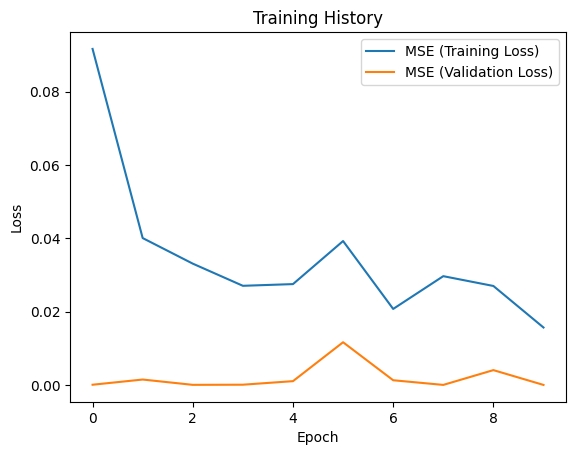

In [2]:
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gc
import tensorflow.keras.backend as K
import glob

# Parameters
appliance_name = "fridge" # kettle, dishwasher, fridge, microwave, washingmachine
dataset_name = "ukdale"
batch_size = 32
crop = 1000
network_type = "seq2point"
training_directory = "dataset_training/ukdale/kettle/kettle_training_.csv"
validation_directory = "dataset_training/ukdale/kettle/kettle_validation_.csv"
save_model_dir = "saved_models/"+ dataset_name + "/" + appliance_name + "_model.h5"
epochs = 10
input_window_length = 599
validation_frequency = 1
patience = 3
min_delta = 1e-6
verbose = 1
loss = "mse"
metrics = ["mse", "msle", "mae"]
learning_rate = 0.001
beta_1 = 0.9
beta_2 = 0.999
shuffle = True

window_size = 2 + input_window_length
window_offset = int((0.5 * window_size) - 1)
offset = window_offset
max_chunk_size = 5 * 10 ** 2
ram_threshold = 5 * 10 ** 5
skip_rows_train = 10000000
validation_steps = 100
skip_rows_val = 0

# Data Loader Function
def load_dataset(file_name, chunk_size, shuffle, offset, batch_size=1000, crop=90000, skip_rows=0, ram_threshold=5 * 10 ** 5):
    print("Loading dataset from: ", file_name)
    try:
        data_array = np.array(pd.read_csv(file_name, nrows=crop, skiprows=skip_rows, header=None))
    except:
        data_array = np.array(pd.read_csv(file_name, header=None, skip_blank_lines=True, delimiter=','))
    inputs = data_array[:, 0]
    outputs = data_array[:, 1]
    maximum_batch_size = inputs.size - 2 * offset
    total_num_samples = maximum_batch_size
    if batch_size < 0:
        batch_size = maximum_batch_size

    indicies = np.arange(maximum_batch_size)
    if shuffle:
        np.random.shuffle(indicies)

    while True:
        for start_index in range(0, maximum_batch_size, batch_size):
            splice = indicies[start_index : start_index + batch_size]
            input_data = np.array([inputs[index : index + 2 * offset + 1] for index in splice])
            output_data = outputs[splice + offset].reshape(-1, 1)
            yield input_data, output_data

# Model Creation Function
def create_model(input_window_length):
    input_layer = tf.keras.layers.Input(shape=(input_window_length,))
    reshape_layer = tf.keras.layers.Reshape((1, input_window_length, 1))(input_layer)
    conv_layer_1 = tf.keras.layers.Convolution2D(filters=30, kernel_size=(10, 1), strides=(1, 1), padding="same", activation="relu")(reshape_layer)
    conv_layer_2 = tf.keras.layers.Convolution2D(filters=30, kernel_size=(8, 1), strides=(1, 1), padding="same", activation="relu")(conv_layer_1)
    conv_layer_3 = tf.keras.layers.Convolution2D(filters=40, kernel_size=(6, 1), strides=(1, 1), padding="same", activation="relu")(conv_layer_2)
    conv_layer_4 = tf.keras.layers.Convolution2D(filters=50, kernel_size=(5, 1), strides=(1, 1), padding="same", activation="relu")(conv_layer_3)
    conv_layer_5 = tf.keras.layers.Convolution2D(filters=50, kernel_size=(5, 1), strides=(1, 1), padding="same", activation="relu")(conv_layer_4)
    flatten_layer = tf.keras.layers.Flatten()(conv_layer_5)
    label_layer = tf.keras.layers.Dense(1024, activation="relu")(flatten_layer)
    output_layer = tf.keras.layers.Dense(1, activation="linear")(label_layer)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model

# Load Dataset for Training
training_chunker = load_dataset(file_name=training_directory, 
                                               chunk_size=max_chunk_size,
                                               batch_size=batch_size,
                                               crop=crop,
                                               shuffle=shuffle,
                                               skip_rows=skip_rows_train,
                                               offset=offset,
                                               ram_threshold=ram_threshold)

# Load Dataset for Validation
validation_chunker = load_dataset(file_name=validation_directory, 
                                                 chunk_size=max_chunk_size,
                                                 batch_size=batch_size,
                                                 crop=crop,
                                                 shuffle=False,
                                                 skip_rows=skip_rows_val,
                                                 offset=offset,
                                                 ram_threshold=ram_threshold)

# Create and Compile the Model
model = create_model(input_window_length)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2), 
              loss=loss, 
              metrics=metrics)

# Set Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", min_delta=min_delta, patience=patience, verbose=verbose, mode="auto")
callbacks = [early_stopping]

# Calculate Steps per Epoch
steps_per_training_epoch = np.round(int(crop / batch_size), decimals=0)

# Train the Model
training_history = model.fit(training_chunker,
                             validation_data=validation_chunker,
                             steps_per_epoch=steps_per_training_epoch,
                             epochs=epochs,
                             verbose=verbose,
                             callbacks=callbacks,
                             validation_steps=validation_steps,
                             validation_freq=validation_frequency)

# Save the Model
if not os.path.exists(save_model_dir):
    open((save_model_dir), 'a').close()
model.save(save_model_dir)

# Plot Training Results
plt.plot(training_history.history["loss"], label="MSE (Training Loss)")
if "val_loss" in training_history.history:
    plt.plot(training_history.history["val_loss"], label="MSE (Validation Loss)")
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

del model
# del test_input, test_target, input_data, testing_history
gc.collect()
K.clear_session()